# Data Modeling Notebook

## Notebook Highlights
### Data Loading:
Combine processed files for a selected asset type.
### Splitting:
Use a fixed split (70% train, 15% validation, 15% test).
### Scaling:
Scale features using MinMaxScaler for uniformity.
### Model:
Random Forest Regressor is used (easily replaceable).
### Evaluation:
Compute MSE, MAE, and R² for validation and test sets.
### Visualization:
Plot actual vs. predicted prices.
### Model Saving:
Save the trained model for future use.

In [18]:
## Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paths
PROCESSED_DATA_DIR = "../processed_data"

# Load Data
asset_type = "stocks"  # Example: Load stocks data
data_path = os.path.join(PROCESSED_DATA_DIR, asset_type)
all_files = os.listdir(data_path)

In [19]:
# Combine all stock data into one DataFrame
df_list = []
for file in all_files:
    filepath = os.path.join(data_path, file)
    temp_df = pd.read_csv(filepath)
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True)

In [20]:
# Ensure timestamp is datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(by="timestamp").reset_index(drop=True)

In [21]:
df.head()

,timestamp,Open,High,Low,close_price,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2010-01-04,59.260220,60.641685,58.774323,60.379684,19.329815,58460615.0,4.205594e+07,58460615.0,0.719389,...,0.0,0.0,0.0,0.0,0.0,0.0,60.379684,0.0,0.0,0.0
1,2010-01-04,28.580000,28.610001,28.450001,28.520000,17.949802,13870400.0,-1.733841e+06,13870400.0,-0.125003,...,0.0,0.0,0.0,0.0,0.0,0.0,28.520000,0.0,0.0,0.0
2,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.347315,38409100.0,1.581558e+07,38409100.0,0.411766,...,0.0,0.0,0.0,0.0,0.0,0.0,30.950001,0.0,0.0,0.0
3,2010-01-04,162.000000,164.399994,160.199997,163.500000,144.702118,5677267.0,3.244167e+06,5677267.0,0.571431,...,0.0,0.0,0.0,0.0,0.0,0.0,163.500000,0.0,0.0,0.0
4,2010-01-04,36.910000,38.240002,36.900002,38.090000,30.864563,712900.0,5.532939e+05,712900.0,0.776117,...,0.0,0.0,0.0,0.0,0.0,0.0,38.090000,0.0,0.0,0.0


In [22]:
print(df.columns.tolist())

['timestamp', 'Open', 'High', 'Low', 'close_price', 'Adj Close', 'Volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp', 'volatility_kchi', 'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv', 'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b', 'trend_stc', 'trend_ad

In [23]:
# Feature Selection
features = ["timestamp", "close_price", "Volume", "momentum_rsi", "trend_macd"]
target = "close_price"

df = df[features + [target]].dropna()

In [24]:
# Split Data
train_size = 0.7
val_size = 0.15
test_size = 0.15

train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=val_size / (1 - test_size), shuffle=False)

# Scaling Data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
val_scaled = scaler.transform(val_data[features])
test_scaled = scaler.transform(test_data[features])

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [25]:
# Prepare Features and Targets
X_train, y_train = train_scaled, train_data[target].values
X_val, y_val = val_scaled, val_data[target].values
X_test, y_test = test_scaled, test_data[target].values

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Validate Model
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse}")
print(f"Validation MAE: {val_mae}")
print(f"Validation R2: {val_r2}")

Validation MSE: 2456.654165688987
Validation MAE: 10.041664002672274
Validation R2: 0.9212269501505738


In [27]:
# Test Model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")

Test MSE: 2981.173564198812
Test MAE: 12.85304463058568
Test R2: 0.9205744697478061


In [28]:
print(test_data.columns)

Index(['timestamp', 'close_price', 'Volume', 'momentum_rsi', 'trend_macd',
       'close_price'],
      dtype='object')


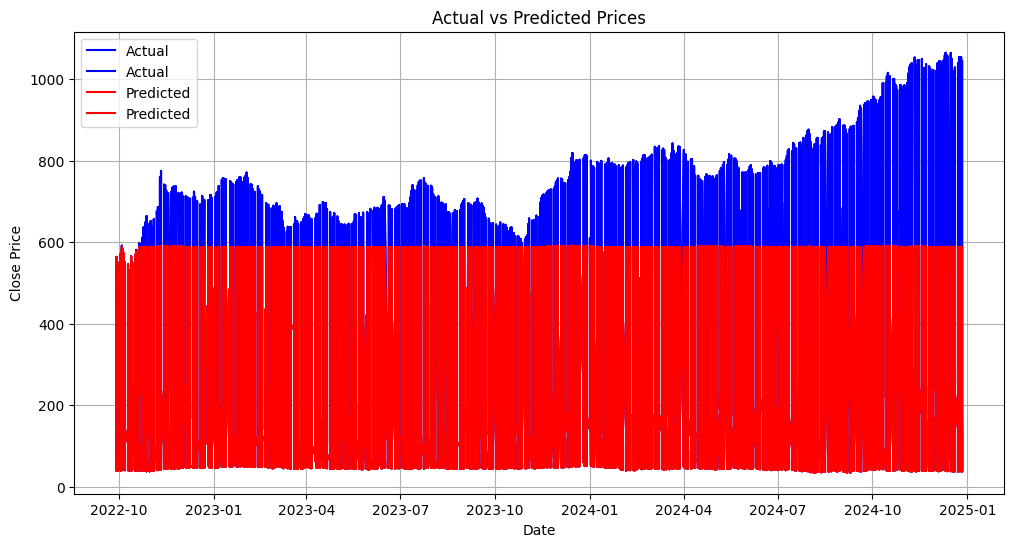

In [29]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(test_data["timestamp"], y_test, label="Actual", color="blue")
plt.plot(test_data["timestamp"], y_test_pred, label="Predicted", color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Save Model
import joblib
model_path = "models/random_forest_model.pkl"
os.makedirs("models", exist_ok=True)
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to models/random_forest_model.pkl
